In [1]:
import sys
sys.path.append("../src/")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from analysis import LayerStats

In [2]:
# set parameters for matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)
script = "/home/nakamura/network_dissection/NetDissect/research/model_comparison_iou_1213.ipynb"

In [3]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "../dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "../dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "../dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "../dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face]

In [5]:
# test purpose
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "../dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = [ "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "../dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "../dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "../dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = [ "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face]

In [4]:
def plot_average(models, category):
    iou_values = {}
    for model in models:
        iou_values[model["name"]] = []
        for blob in model["blobs"]:
            blob_stats = LayerStats(model["directory"], blob)
            iou_values[model["name"]].append(blob_stats.unit_average_stats()[category])
    fig, ax = plt.subplots()
    for model in models:
        ax.plot(iou_values[model["name"]], label=model["name"])
    ax.legend(loc = "upper left")
    ax.set_xticklabels(alex["blobs"])
    ax.set_title("Average IOU {}".format(category))
    ax.set_ylabel("Average Interpretability of a layer")
    
    return iou_values, ax

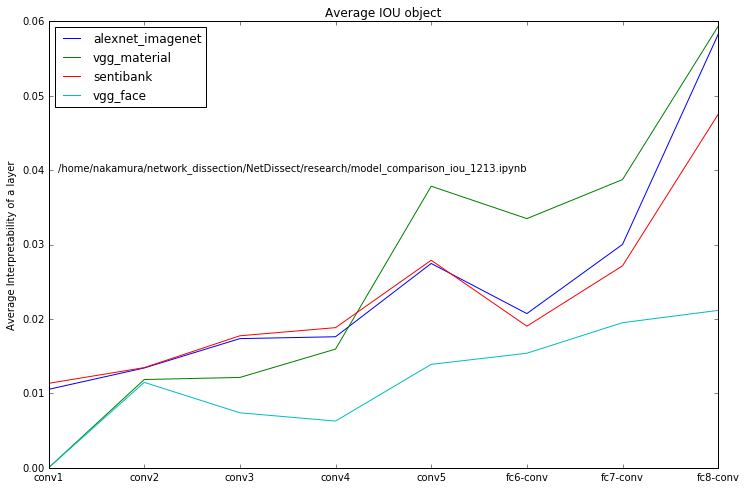

In [5]:
category = "object"
_, ax = plot_average(models, category)
ax.text(0.1, 0.04, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))

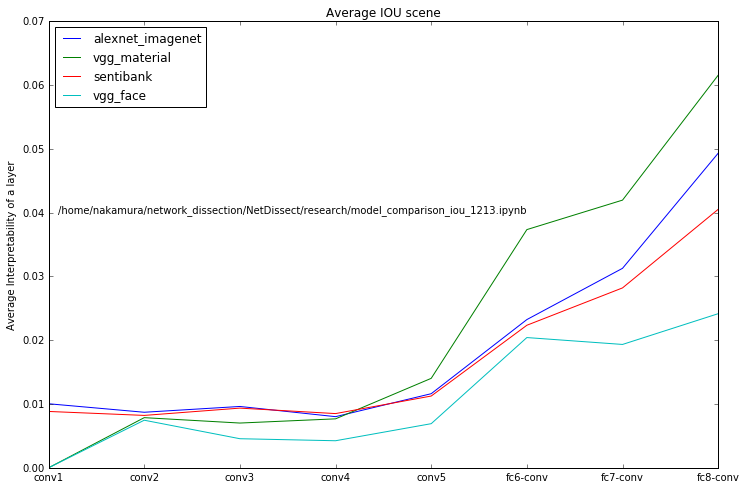

In [6]:
category = "scene"
_, ax = plot_average(models, category)
ax.text(0.1, 0.04, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))

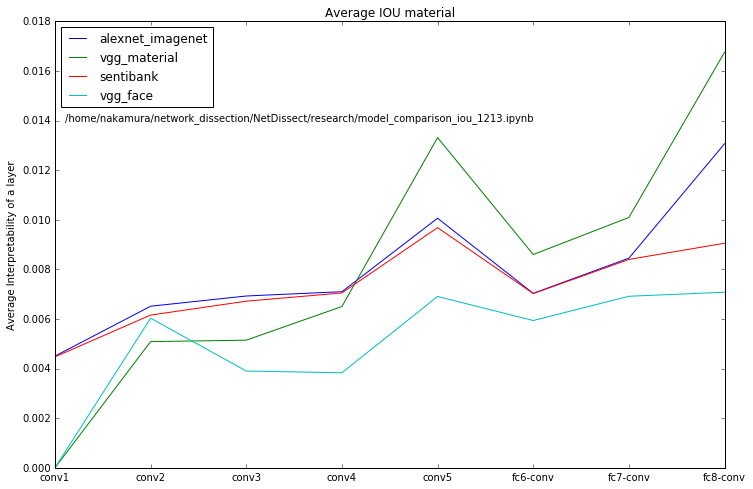

In [7]:
category = "material"
_, ax = plot_average(models, category)
ax.text(0.1, 0.014, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))

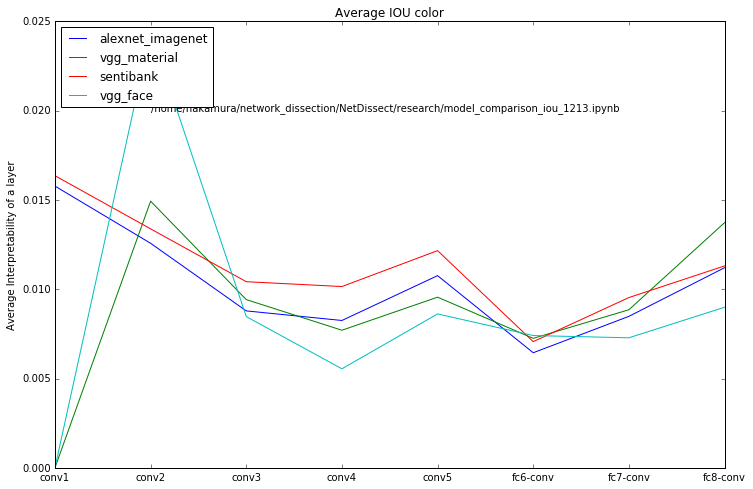

In [8]:
category = "color"
_, ax = plot_average(models, category)
ax.text(1, 0.02, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))

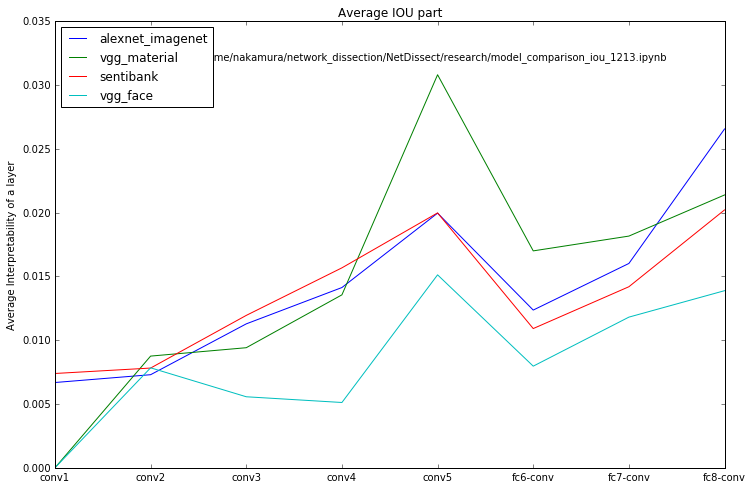

In [9]:
category = "part"
_, ax = plot_average(models, category)
ax.text(1.5, 0.032, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))

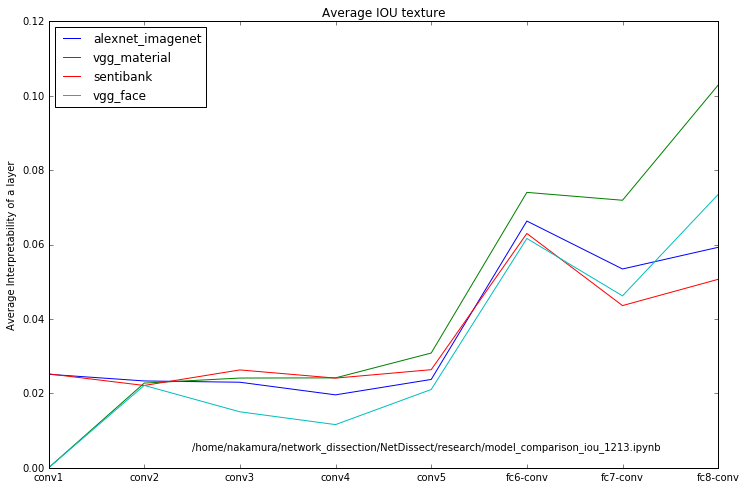

In [10]:
category = "texture"
_, ax = plot_average(models, category)
ax.text(1.5, 0.005, script)
plt.savefig(os.path.join("figures/average_iou/", "average_iou_{}_1215.pdf".format(category)))